## Parsing log files

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import glob
import os
import re
from pathlib import Path
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

from dyn_fed.utils.report_utils import parse_logs, extract_values
from dyn_fed.viz.report import plot_loss

In [4]:
project_dir = Path().resolve().parents[1]

In [109]:
project_dir

PosixPath('/Users/sashlinreddy/repos/masters/dyn-fed')

In [110]:
lookup_date = "20200427"
lookup_date2 = "20200428"
lookup_date3 = "20200509"
datadir = "data/"
# log_dir = "logs/slurm" # If on slurm
log_dir = project_dir/datadir/lookup_date
log_dir2 = project_dir/datadir/lookup_date2
log_dir3 = project_dir/datadir/lookup_date3

In [111]:
# files = glob.glob(str(log_dir/"*/*/*/*/log-client*"))
files = glob.glob(str(log_dir/"*/*/*/*/logfile*"))
files.extend(glob.glob(str(log_dir2/"*/*/*/*/logfile*")))
files.extend(glob.glob(str(log_dir3/"*/*/*/*/logfile*")))

In [112]:
len(files)

2088

## Find index of field we are interested in and beyond

In [113]:
results = parse_logs(files, lookup_date)

Parsed 2088 files


In [102]:
queries = [
    "noniid == '1' and unbalanced == '0'"
]

In [105]:
base_query = (
    "model_type == 'logistic' and dataset == 'mnist' and optimizer == 'adam'"
    " and learning_rate == '0.001' and n_workers == '16'"
)

In [99]:
# encode_vars = [
#         "n_workers", "scenario", "quantize",
#         "aggregate_mode", "interval", "mode", "noniid",
#         "unbalanced", "learning_rate", "n_iterations"
#     ]

In [100]:
l = extract_values(results, base_query + ' and ' + queries[0])

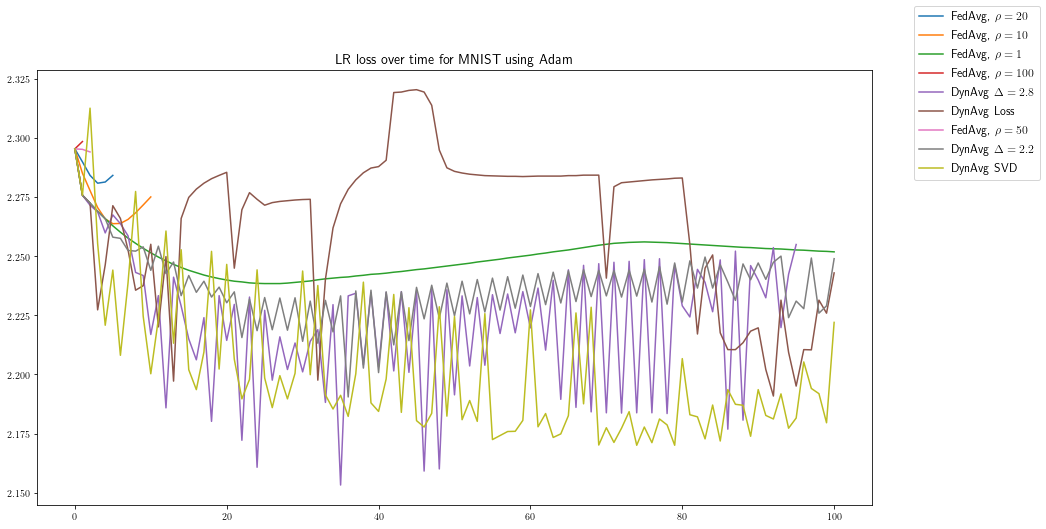

<Figure size 432x288 with 0 Axes>

In [106]:
plot_loss(
    results,
    base_query,
    queries,
    ncols=1,
    title='LR loss over time for MNIST using Adam',
#     order=[3, 8, 6, 2, 5, 2, 4, 7, 1]
)

(1, 2)

Found 9 items


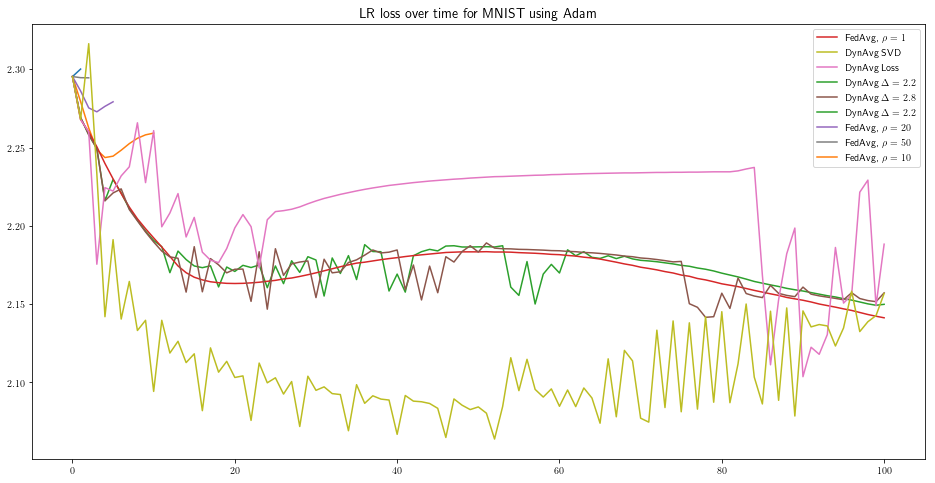

In [61]:
plot_loss(
    lookup,
    labels,
    title='LR loss over time for MNIST using Adam',
    order=[3, 8, 6, 2, 5, 2, 4, 7, 1]
)

In [111]:
lookup2 = extract_values(
    results,
    "model_type == 'cnn1' and dataset == 'mnist' and optimizer == 'sgd'"
    " and learning_rate == '0.01' and noniid == '0' and unbalanced == '1'"
    " and n_workers == '16'"
)

Found 10 items


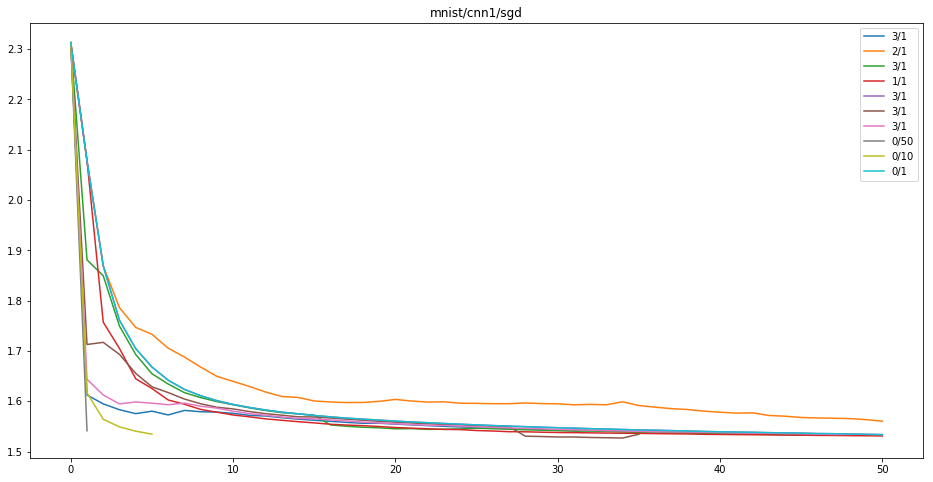

In [112]:
print(f"Found {len(lookup2)} items")
if lookup2:
    plt.figure(figsize=(16, 8))
    k, v = list(lookup2[0].items())[0]
    title = "/".join(k.split("/")[1:-2])
    plt.title(title)
    for l in lookup2:
        k, v = list(l.items())[0]
        s = k.split("/")[-2].split("-")
        mode = s[5] + f"/{s[4]}"
        label = mode
        # plt.plot(v['train'], label="train/" + label)
        plt.plot(v['test'], label=label)

    plt.legend()
else:
    print("No results found")